In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import requests

## Hypothesis 3
Spam content has url features not present in non-spam content url links.

## EDA
General url trend in entire dataset.

In [3]:
full_df = pd.read_csv("../data/raw/full_df.csv")

In [4]:
def count_urls(text):
    if not isinstance(text, str):
        return 0
    # Add re.IGNORECASE
    url_pattern = re.compile(r'(?:https?://|www\.)\S+', re.IGNORECASE)
    urls_found = url_pattern.findall(text)
    return len(urls_found)

def url_list(text):
    if not isinstance(text, str):
        # Return an empty list for consistency, not 0
        return []
    # Add re.IGNORECASE
    url_pattern = re.compile(r'(?:https?://|www\.)\S+', re.IGNORECASE)
    urls_found = url_pattern.findall(text)
    return urls_found


In [5]:
full_df['url_count'] = full_df['body'].apply(count_urls)
full_df['url_list'] = full_df['body'].apply(url_list)
full_df.sample(2)

,body,cleaned_body,label,pos_tags,percentage_vb_dt_nn,percentage_vb_jj_nn,percentage_nn_md_vb,tokens,url_count,url_list
64222,kulbrandstad ) a colleague who does not yet ha...,kulbrandstad a colleague who does not yet have...,0,"['VB', 'DT', 'NN', 'WP', 'VBZ', 'RB', 'RB', 'V...",2.150538,2.150538,1.075269,"['kulbrandstad', 'colleague', 'yet', 'access',...",0,[]
8820,Subject: nominations on hpl purchase and sale ...,due to low volumes flowing from fuels cotton v...,0,"['JJ', 'TO', 'JJ', 'NNS', 'VBG', 'IN', 'NNS', ...",3.086420,3.086420,0.617284,"['due', 'low', 'volume', 'flowing', 'fuel', 'c...",0,[]


In [6]:
import matplotlib.pyplot as plt

C:\Users\yingo\AppData\Local\Temp\ipykernel_3924\1081376577.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


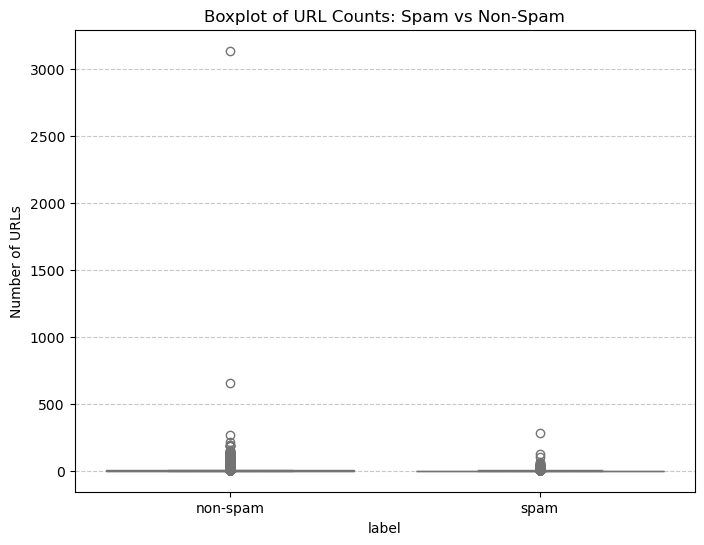

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='label', y='url_count', data=full_df, palette='pastel', hue='label', legend=False)
current_labels_text = [item.get_text() for item in ax.get_xticklabels()]
labels = {'0':'non-spam', '1':'spam'}
new_labels = [labels.get(lbl, lbl) for lbl in current_labels_text]
ax.set_xticklabels(new_labels)
plt.title('Boxplot of URL Counts: Spam vs Non-Spam')
plt.ylabel('Number of URLs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
full_df.sort_values(by='url_count', ascending=False).head(5)

,body,cleaned_body,label,pos_tags,percentage_vb_dt_nn,percentage_vb_jj_nn,percentage_nn_md_vb,tokens,url_count,url_list
69146,change your settings: http://blo.gs/settings.p...,change your settings here is your list of upda...,0,"['VB', 'PRP$', 'NNS', 'RB', 'VBZ', 'PRP$', 'NN...",1.601513,3.076923,0.088272,"['change', 'setting', 'list', 'updated', 'webl...",3134,"[http://blo.gs/settings.php, http://love-alway..."
9730,Would anyone object to removing .so from this ...,would anyone object to removing so from this l...,0,"['MD', 'NN', 'VB', 'TO', 'VBG', 'RB', 'IN', 'D...",0.443262,2.039007,0.177305,"['would', 'anyone', 'object', 'removing', 'lis...",652,[http://en.wikipedia.org/wiki/.so_%28domain_na...
70382,This is a multi-part message in MIME format. -...,this is a multipart message in mime format nex...,1,"['DT', 'VBZ', 'DT', 'JJ', 'NN', 'IN', 'JJ', 'J...",1.379582,0.906583,0.473000,"['multipart', 'message', 'mime', 'format', 'ne...",279,"[http://search.yell.co.uk, http://www.yell.co...."
26647,\nACTIVITY SUMMARY (03/14/08 - 03/21/08)\nTrac...,activity summary tracker at to view or respond...,0,"['NN', 'JJ', 'NN', 'IN', 'TO', 'VB', 'CC', 'VB...",0.931929,4.943274,0.810373,"['activity', 'summary', 'tracker', 'view', 're...",266,"[http://bugs.python.org/, http://bugs.python.o..."
68883,::: L I N K S F O R T H E D A Y :::\n\nT...,l i n k s f o r t h e d a y todays news on the...,0,"['NN', 'NN', 'VBP', 'NN', 'NN', 'NN', 'NN', 'N...",1.899335,1.244065,0.341880,"['l', 'n', 'k', 'f', 'r', 'h', 'e', 'today', '...",218,"[http://freshmeat.net/daily/2002/07/30/, http:..."


In [9]:
# url count mean and median for non-spam
spam_count = full_df[full_df['label'] == 0]['url_count']
print(spam_count.mean())
print(spam_count.median())

1.9750768952415416
0.0


In [10]:
# url count mean and median for spam
nonspam_count = full_df[full_df['label'] == 1]['url_count']
print(nonspam_count.mean())
print(nonspam_count.median())

0.5048155978388537
0.0


From above boxplot and brief glance at rows with the most url counts, there is no obvious relationship between url count and spam emails. However, we see that the spread is rather messy, suggesting that boxplot may not be the best way to test this hypothesis. 

The high value for mean of url counts for non-spam is likely due to the extreme outliers with thousands of url links, so further investigation is required.

Furthermore, we know from n-grams analysis previously that 'http' and 'com' are common words in spam. Hence, we conduct further analyses into this hypothesis. 

Given the extreme outliers found in non-spam content with some having thousands of url links, coupled with the median being 0 for both, we could instead look at the presence or absence of url links altogether. 

In [11]:
# simple look into proportion of spam/non-spam with url links.
spam_proportion = (spam_count > 0).mean()
nonspam_proportion = (nonspam_count > 0).mean()
print(f"% Spam with >0 URLs: {spam_proportion * 100}%")
print(f"% Ham with >0 URLs: {nonspam_proportion * 100}%")

% Spam with >0 URLs: 49.17375309088716%
% Ham with >0 URLs: 34.03973287694218%


In [12]:
import matplotlib.pyplot as plt

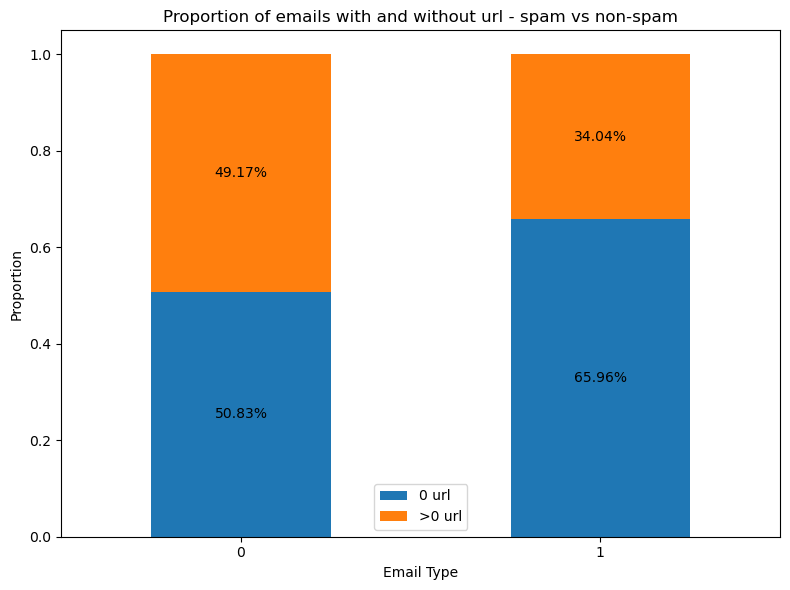

In [13]:
full_df['has_url'] = full_df['url_count'] > 0

# to plot stacked bar plot 
proportions = full_df.groupby('label')['has_url'].value_counts(normalize=True).unstack()
proportions.columns = ['0 url', '>0 url']

ax = proportions.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0)

# show percentage
for container in ax.containers:
    ax.bar_label(container, fmt='{:.2%}', label_type='center')

plt.title('Proportion of emails with and without url - spam vs non-spam')
plt.ylabel('Proportion')
plt.xlabel('Email Type')
plt.tight_layout()
plt.show()

Preparing data

In [14]:
training = pd.read_csv("../data/processed/training.csv")
testing = pd.read_csv("../data/processed/testing.csv")

In [15]:
import re
from urllib.parse import urlparse
import numpy as np

In [16]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def extract_url_features(text):
    urls = re.findall(url_pattern, text)
    num_urls = len(urls)
    features = {'num_urls': num_urls}

    if num_urls == 0:
        # Assign default values for other features
        features['avg_url_length'] = 0
        features['max_url_length'] = 0
        # ... other defaults ...
        features['domain_has_digits'] = 0 # Using 0 for False
        features['is_ip_url'] = 0
        # ... etc ...
        return features

    total_len = 0
    max_len = 0
    domain_digits_count = 0
    ip_url_count = 0
    # ... initialize other counters/accumulators ...

    for url in urls:
        try:
            parsed = urlparse(url)
            netloc = parsed.netloc
            path = parsed.path
            query = parsed.query

            # URL Lengths
            current_len = len(url)
            total_len += current_len
            if current_len > max_len:
                max_len = current_len

            # Domain features
            if any(char.isdigit() for char in netloc):
                domain_digits_count += 1
            # Check if netloc looks like an IP address (simplistic check)
            if re.match(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$", netloc):
                 ip_url_count += 1
            # ... calculate other domain, path, query features ...

        except Exception: # Handle potential parsing errors for malformed URLs
            continue

    features['avg_url_length'] = total_len / num_urls if num_urls > 0 else 0
    features['max_url_length'] = max_len
    features['domain_has_digits'] = 1 if domain_digits_count > 0 else 0
    features['is_ip_url'] = 1 if ip_url_count > 0 else 0
    # ... add other calculated features ...

    return features

In [17]:
temp_training = training.copy()
temp_testing = testing.copy()

training_urlfeatures = temp_training['body'].apply(lambda x: extract_url_features(x if isinstance(x, str) else ''))
testing_urlfeatures = temp_testing['body'].apply(lambda x: extract_url_features(x if isinstance(x, str) else ''))

train_url_features_df = pd.DataFrame(training_urlfeatures.tolist())
train_df_with_url_features = pd.concat([temp_training.reset_index(drop=True), train_url_features_df.reset_index(drop=True)], axis=1)

test_url_features_df = pd.DataFrame(testing_urlfeatures.tolist())
test_df_with_url_features = pd.concat([temp_testing.reset_index(drop=True), test_url_features_df.reset_index(drop=True)], axis=1)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [19]:
X_train =  train_df_with_url_features[['percentage_vb_dt_nn', 'percentage_vb_jj_nn', 'percentage_nn_md_vb']]
X_test = test_df_with_url_features[['percentage_vb_dt_nn', 'percentage_vb_jj_nn', 'percentage_nn_md_vb']]

X_train_temp =  train_df_with_url_features[['percentage_vb_dt_nn', 'percentage_vb_jj_nn', 'percentage_nn_md_vb', 
                               'num_urls', 'avg_url_length', 'max_url_length', 'domain_has_digits', 'is_ip_url']]
X_test_temp = test_df_with_url_features[['percentage_vb_dt_nn', 'percentage_vb_jj_nn', 'percentage_nn_md_vb', 
                               'num_urls', 'avg_url_length', 'max_url_length', 'domain_has_digits', 'is_ip_url']]

y_train_temp = train_df_with_url_features['label']
y_test_temp = test_df_with_url_features['label']

## Modelling
Baseline model: Logistic regression on data with POS tagging (already in training and testing dataframes).

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def visualise_perf(y_true, y_pred, y_prob, title):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    print(title)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"AUC      : {auc:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Spam', 'Spam'],
                yticklabels=['Non-Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

Logistic Regression without url features
Accuracy : 0.6401
Precision: 0.6311
Recall   : 0.5763
F1 Score : 0.6025
AUC      : 0.6706


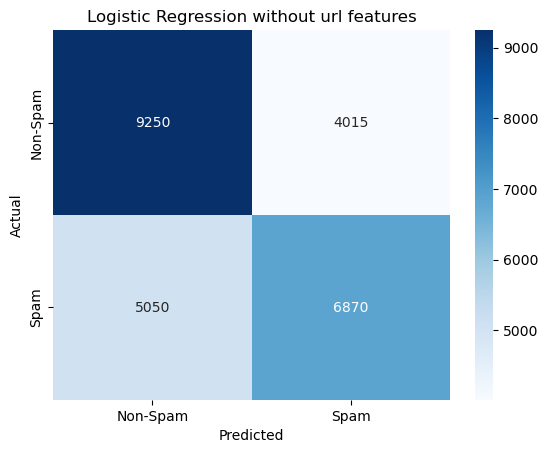

Logistic Regression with url features
Accuracy : 0.6614
Precision: 0.6286
Recall   : 0.6955
F1 Score : 0.6603
AUC      : 0.7284


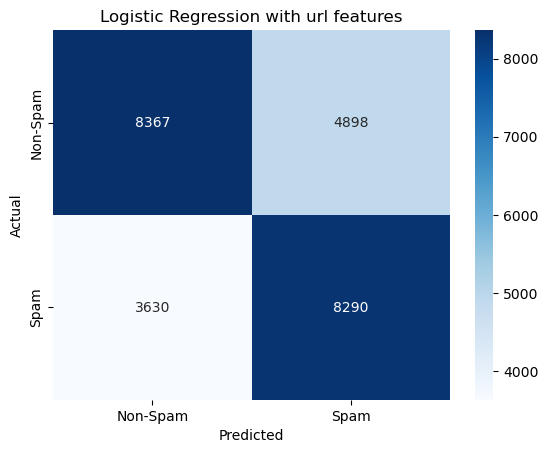

In [43]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_temp)
y_pred = log_reg.predict(X_test)
y_prod = log_reg.predict_proba(X_test)[:, 1]
visualise_perf(y_test_temp, y_pred, y_prod, "Logistic Regression without url features")

log_reg2 = LogisticRegression(max_iter=1000, random_state=42)
log_reg2.fit(X_train_temp, y_train_temp)
y_pred2 = log_reg2.predict(X_test_temp)
y_prod2 = log_reg2.predict_proba(X_test_temp)[:, 1]
visualise_perf(y_test_temp, y_pred2, y_prod2, "Logistic Regression with url features")

Overall, with url features added, we see an improvement in model performance. 

From model analysis, we concluded that BoW had the best performance overall. Hence we also include that feature for further analysis.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

In [22]:
vectorizer = CountVectorizer(max_features=1000)  

X_bow_train = vectorizer.fit_transform(training['cleaned_body'])
X_bow_test = vectorizer.transform(testing['cleaned_body'])

In [23]:
X_train_no_url = hstack([X_bow_train, X_train])
X_test_no_url = hstack([X_bow_test, X_test])

X_train_url = hstack([X_bow_train, X_train_temp])
X_test_url = hstack([X_bow_test, X_test_temp])

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# scaling for performance

# without url
scaler_pos = StandardScaler()

X_train_np = X_train.values
X_test_np = X_test.values

X_train_scaled = scaler_pos.fit_transform(X_train_np)
X_test_scaled = scaler_pos.transform(X_test_np) 

X_train_no_url_scaled = hstack([X_bow_train, X_train_scaled]).tocsr()
X_test_no_url_scaled = hstack([X_bow_test, X_test_scaled]).tocsr()

# with url
scaler_pos_url = StandardScaler()

X_train_np_url = X_train_temp.values
X_test_np_url = X_test_temp.values

X_train_url_scaled = scaler_pos_url.fit_transform(X_train_np_url)
X_test_url_scaled = scaler_pos_url.transform(X_test_np_url)  

X_train_with_url_scaled = hstack([X_bow_train, X_train_url_scaled]).tocsr() 
X_test_with_url_scaled = hstack([X_bow_test, X_test_url_scaled]).tocsr()

Logistic Regression + BoW without url features
Accuracy : 0.9575
Precision: 0.9426
Recall   : 0.9691
F1 Score : 0.9557
AUC      : 0.9896


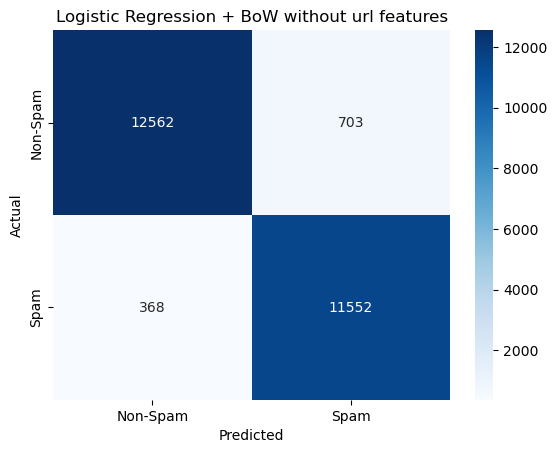

Logistic Regression + BoW with url features
Accuracy : 0.9587
Precision: 0.9436
Recall   : 0.9707
F1 Score : 0.9570
AUC      : 0.9903


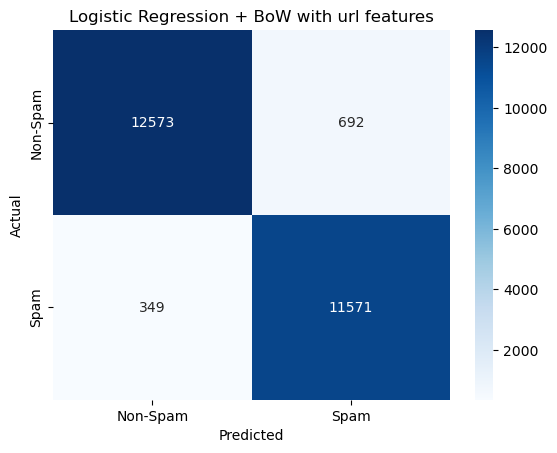

In [44]:
log_reg3 = LogisticRegression(max_iter=1000, random_state=42)
log_reg3.fit(X_train_no_url_scaled, y_train_temp)
y_pred3 = log_reg3.predict(X_test_no_url_scaled)
y_prod3 = log_reg3.predict_proba(X_test_no_url_scaled)[:, 1]
visualise_perf(y_test_temp, y_pred3, y_prod3, "Logistic Regression + BoW without url features")

log_reg4 = LogisticRegression(max_iter=1000, random_state=42)
log_reg4.fit(X_train_with_url_scaled, y_train_temp)
y_pred4 = log_reg4.predict(X_test_with_url_scaled)
y_prod4 = log_reg4.predict_proba(X_test_with_url_scaled)[:, 1]
visualise_perf(y_test_temp, y_pred4, y_prod4, "Logistic Regression + BoW with url features")

With BoW, we see much better performance, indicating that BoW is a strong and dominating feature in predicting spam content for our dataset. With url features considered, the model performs even better. 